In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

file_path = r"C:\Users\DELL\OneDrive\Desktop\human.txt"
df = pd.read_csv(file_path, sep='\t')


sequences = df['sequence']
labels = df['class']

print(df)



                                               sequence  class
0     ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1     ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4     ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3
...                                                 ...    ...
4375  ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...      0
4376  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4377  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4378  ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...      6
4379  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6

[4380 rows x 2 columns]


In [40]:
def get_kmers(seq, k=3):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

vectorizer = CountVectorizer(analyzer=get_kmers)
X = vectorizer.fit_transform(sequences)
y = labels

X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm = SVC(kernel="linear").fit(X_train, y_train)

rf_pred, svm_pred = rf.predict(X_test), svm.predict(X_test)

def evaluate(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    

In [41]:
evaluate("Random Forest", y_test, rf_pred)



Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       102
           1       0.85      0.67      0.75       106
           2       0.96      0.65      0.78        78
           3       0.77      0.64      0.70       125
           4       0.64      0.69      0.66       149
           5       0.91      0.61      0.73        51
           6       0.71      0.94      0.81       265

    accuracy                           0.75       876
   macro avg       0.81      0.70      0.74       876
weighted avg       0.77      0.75      0.75       876

Accuracy: 0.7511415525114156
Precision: 0.7701430882180287
Recall: 0.7511415525114156
F1 Score: 0.7486308398607723


In [42]:
def plot_cm(y_true, y_pred, title):
    # Automatically detect unique labels
    labels = sorted(list(set(y_true)))
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

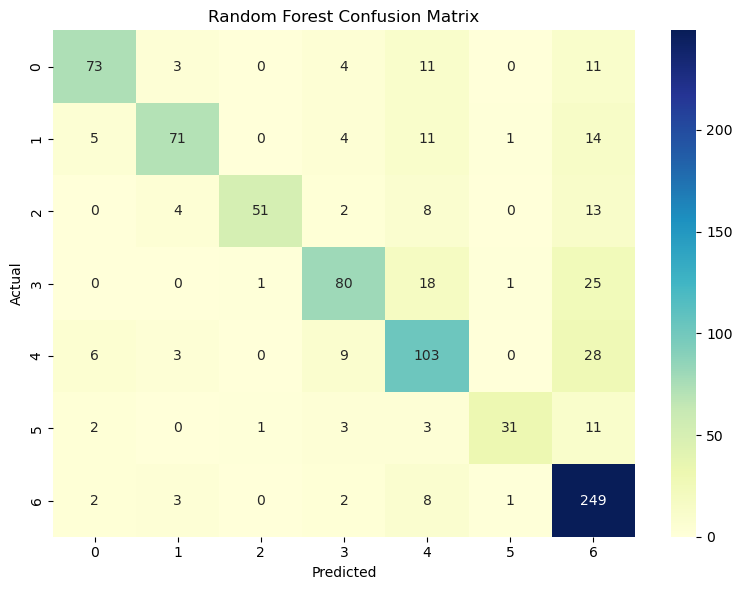

In [43]:
plot_cm(y_test, rf_pred, "Random Forest Confusion Matrix")

In [44]:
evaluate("SVM", y_test, svm_pred)


SVM Results:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       102
           1       0.62      0.64      0.63       106
           2       0.75      0.51      0.61        78
           3       0.51      0.52      0.52       125
           4       0.51      0.48      0.50       149
           5       0.66      0.41      0.51        51
           6       0.66      0.78      0.72       265

    accuracy                           0.63       876
   macro avg       0.64      0.58      0.60       876
weighted avg       0.63      0.63      0.62       876

Accuracy: 0.6255707762557078
Precision: 0.6272663396587245
Recall: 0.6255707762557078
F1 Score: 0.6211872119082913


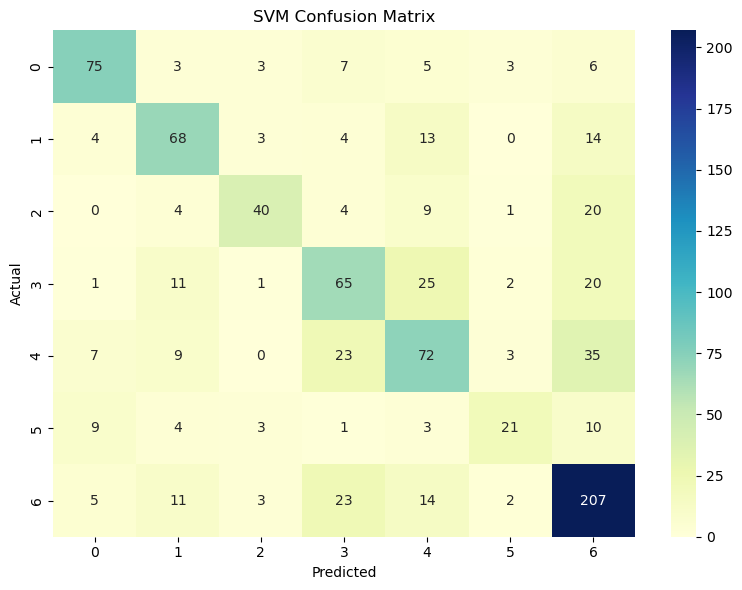

In [45]:
plot_cm(y_test, svm_pred, "SVM Confusion Matrix")

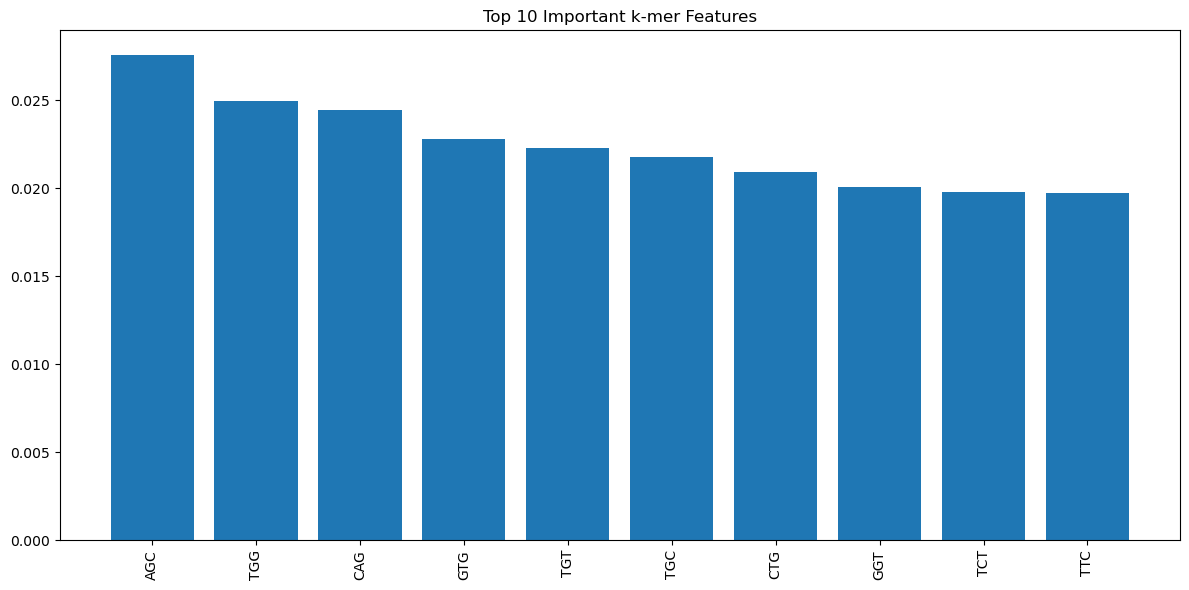

In [46]:
imp = rf.feature_importances_
idx = np.argsort(imp)[-10:][::-1]  # Top 10 important features
plt.figure(figsize=(12,6))
plt.bar(range(10), imp[idx], tick_label=[X_df.columns[i] for i in idx])
plt.title("Top 10 Important k-mer Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
